# Keras tutorial
This tutorial is a modification from https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [1]:
import numpy as np
from keras.models import Sequential # linear stack of neural network layers
from keras.layers import Dense, Dropout, Activation, Flatten # layers to use
from keras.layers import Convolution2D, MaxPooling2D # CNN layers
from keras.utils import np_utils
from keras.utils import to_categorical
%load_ext autotime

C:\Users\oscar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading Data

Loading MURA images

In [2]:
import utils # importing from our utils functions

time: 4.81 s


In [3]:
x_train, y_train, x_test, y_test = utils.read_mura_pickle()

INFO:utils.utils:loading data/MURA-v1.1/x_train.pkl
INFO:utils.utils:loading data/MURA-v1.1/y_train.pkl
INFO:utils.utils:loading data/MURA-v1.1/x_valid.pkl
INFO:utils.utils:loading data/MURA-v1.1/y_valid.pkl


time: 2.79 s


We can look at the shape of the dataset:

In [4]:
x_train.shape

(36808, 256, 256)

time: 5 ms


Visually inspect an image:

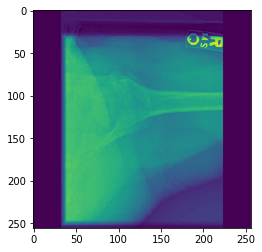

time: 134 ms


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

## Data preparation

reshape the data from $512\times512$ to $512\times512\times1$ (1 for channel)

In [6]:
x_train = x_train.reshape(x_train.shape[0], 256, 256, 1)
x_test = x_test.reshape(x_test.shape[0], 256, 256, 1)

time: 1 ms


In [7]:
x_train.shape

(36808, 256, 256, 1)

time: 2 ms


Convert our data type to float32 and normalize our data values to the range [0, 1].

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

time: 6.36 s


We have a 0-1 target so it's naturally one-hot coded, just need to reshape it to have one column

In [9]:
y_train = y_train.reshape(y_train.shape[0], 1)

time: 1e+03 µs


In [10]:
y_train.shape

(36808, 1)

time: 2 ms


## Define model architecture

In [11]:
# declare sequential model
model = Sequential() 

time: 1.01 ms


In [12]:
# CNN input layer 
# the defaults for strides is (1,1) but it's always good to be explicit
model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu', input_shape=(256, 256, 1)))

time: 15 ms


We can check the shape of our model output after adding this layer

In [13]:
model.output_shape

(None, 254, 254, 32)

time: 2 ms


And we can just keep adding layers like we are building legos

In [14]:
model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

time: 29 ms


MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

Dropout is used to prevent overfitting - read more about it [here](https://www.quora.com/How-does-the-dropout-method-work-in-deep-learning-And-why-is-it-claimed-to-be-an-effective-trick-to-improve-your-network)

In [15]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

time: 41 ms


## Compile model

We still need to define the loss and optimization method. Keras has a variety of [loss functions](https://keras.io/losses/) and out-of-the-box [optimizers](https://keras.io/optimizers/) to choose from. For this tutorial we'll use cross-entropy as loss function and [Adam](https://arxiv.org/abs/1412.6980) as our optimizer.

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

time: 99.5 ms


## Fitting the model

In [17]:
model.fit(x_train, y_train, 
          batch_size=8, nb_epoch=10, verbose=1)

C:\Users\oscar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
36808/36808 [==============================] - 946s 26ms/step - loss: 0.6692 - acc: 0.6000
Epoch 2/10
36808/36808 [==============================] - 942s 26ms/step - loss: 0.6400 - acc: 0.6323
Epoch 3/10
36808/36808 [==============================] - 941s 26ms/step - loss: 0.5630 - acc: 0.7071
Epoch 4/10
36808/36808 [==============================] - 971s 26ms/step - loss: 0.4338 - acc: 0.7930
Epoch 5/10
36808/36808 [==============================] - 941s 26ms/step - loss: 0.3085 - acc: 0.8632
Epoch 6/10
36808/36808 [==============================] - 941s 26ms/step - loss: 0.2379 - acc: 0.9067
Epoch 7/10
36808/36808 [==============================] - 941s 26ms/step - loss: 0.1513 - acc: 0.9402
Epoch 8/10
36808/36808 [==============================] - 941s 26ms/step - loss: 0.1183 - acc: 0.9569
Epoch 9/10
36808/36808 [==============================] - 942s 26ms/step - loss: 0.0963 - acc: 0.9661
Epoch 10/10
36808/36808 [==============================] - 944s 26ms/step - loss: 

time: 2h 37min 31s


We can check how loss and accuracy change over epochs

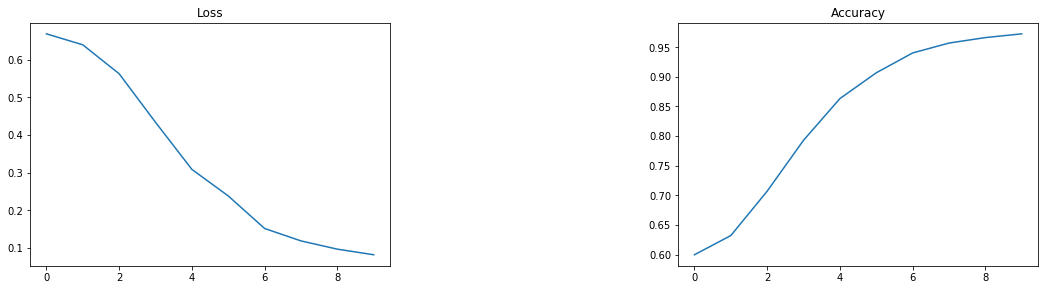

time: 171 ms


In [18]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.subplot(122)
plt.plot(model.history.history['acc'])
plt.title('Accuracy')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

## Evaluating our model on the test set

### Loss and Accuracy

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)

time: 8.95 s


In [20]:
score

[2.48069288796248, 0.5605254925561391]

time: 2 ms


In [21]:
# compute predicted y
y_test_hat = model.predict(x_test)

time: 8.04 s


In [53]:
# y_test reshape
#print(y_test.size)
#y_test.shape
#y_test = y_test.reshape(y_test.shape[0], 1)
#print(y_test.size)
y_test.shape




(3197, 1)

time: 1.99 ms


In [58]:
# get actual digit labels
true_label = np.argmax(y_test, axis=1)
pred_label = np.argmax(y_test_hat, axis=1)

time: 1 ms


### Cohen's Kappa

In [59]:
p_observed = (true_label == pred_label).sum()/true_label.shape[0]
p_expected = sum([(true_label == i).sum() * (pred_label == i).sum() / (true_label.shape[0] ** 2) for i in range(10)])

time: 1.97 ms


In [60]:
kappa = (p_observed - p_expected) / (1 - p_expected)

time: 1 ms


C:\Users\oscar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [57]:
kappa

0.0

time: 1.98 ms
